## Import data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%cd ..

D:\anomaly-detection


In [3]:
data = pd.read_csv('data/processed/tep_data.csv', index_col='Index')
print(f'Len of dataset: {data.shape[0]}')

Len of dataset: 12801


In [4]:
window_length = 64
stride = 0

X = np.array([
    data.iloc[i - window_length:i].to_numpy().flatten()
    for i in range(window_length, data.shape[0] - window_length - stride)
]).reshape(-1, window_length, data.shape[1])

In [5]:
def split_by_3rd_dim(X):
    squeeze = lambda els: list(map(lambda el: el.squeeze(), els))
    return squeeze(np.dsplit(X, X.shape[2]))

## Train model

In [6]:
from src.models.autoencoder import build_matrix_autoencoder
import keras

create_params = dict(
    input_shape=window_length,
    hidden_layer_size=16,
    reg_strength=0.01,
    input_dropout=0.1,
)

compile_params = dict(
    optimizer=keras.optimizers.Adam(lr=0.1),
)

fit_params = dict(
    batch_size=64,
    epochs=100,
    verbose=1,
    callbacks=[keras.callbacks.ReduceLROnPlateau(patience=10, factor=0.2, verbose=1),
               keras.callbacks.EarlyStopping(min_delta=0.01, patience=20)]
)


model_fn = lambda: build_matrix_autoencoder(X.shape[2], create_params, compile_params)

Using TensorFlow backend.


In [7]:
from sklearn.model_selection import TimeSeriesSplit

tssplit = TimeSeriesSplit(n_splits=3)
results = []

for i, (train_idx, test_idx) in enumerate(tssplit.split(X, X)):
    print(f'Fold {i}...')
    model = model_fn()
    
    X_tr = split_by_3rd_dim(X[train_idx])
    X_val = split_by_3rd_dim(X[test_idx])
    
    history = model.fit(X_tr,
                        X_tr,
                        validation_data=(X_val, X_val),
                        **fit_params)
    results.append(history.history)

Fold 0...
Train on 3169 samples, validate on 3168 samples
Epoch 1/100
3169/3169 [==============================] - 7s 2ms/step - loss: 36.7947 - sequential_1_loss: 1.3405 - sequential_2_loss: 0.7870 - sequential_3_loss: 0.6986 - sequential_4_loss: 1.1959 - sequential_5_loss: 1.0538 - sequential_6_loss: 0.6211 - sequential_7_loss: 0.4963 - sequential_8_loss: 0.7703 - sequential_9_loss: 0.7176 - sequential_10_loss: 1.1798 - sequential_11_loss: 0.6100 - sequential_12_loss: 0.5929 - sequential_13_loss: 0.6208 - sequential_14_loss: 0.5428 - sequential_15_loss: 0.6000 - sequential_16_loss: 0.5419 - sequential_17_loss: 0.7397 - sequential_18_loss: 0.9770 - sequential_19_loss: 0.7455 - sequential_20_loss: 0.7358 - sequential_21_loss: 0.4960 - sequential_22_loss: 0.6955 - sequential_23_loss: 0.7951 - sequential_24_loss: 0.5243 - sequential_25_loss: 1.1301 - sequential_26_loss: 0.6233 - sequential_27_loss: 0.6095 - sequential_28_loss: 0.5959 - sequential_29_loss: 0.7667 - sequential_30_loss: 0.6

3169/3169 [==============================] - 2s 501us/step - loss: 14.2979 - sequential_1_loss: 0.1154 - sequential_2_loss: 0.7610 - sequential_3_loss: 0.6236 - sequential_4_loss: 0.3060 - sequential_5_loss: 0.2414 - sequential_6_loss: 0.2551 - sequential_7_loss: 0.6330 - sequential_8_loss: 0.5421 - sequential_9_loss: 0.6860 - sequential_10_loss: 0.0960 - sequential_11_loss: 0.2060 - sequential_12_loss: 0.3922 - sequential_13_loss: 0.1406 - sequential_14_loss: 0.4095 - sequential_15_loss: 0.2167 - sequential_16_loss: 0.1292 - sequential_17_loss: 0.7305 - sequential_18_loss: 0.1059 - sequential_19_loss: 0.7470 - sequential_20_loss: 0.1845 - sequential_21_loss: 0.1402 - sequential_22_loss: 0.1288 - sequential_23_loss: 0.1631 - sequential_24_loss: 0.1901 - sequential_25_loss: 0.1486 - sequential_26_loss: 0.2891 - sequential_27_loss: 0.2521 - sequential_28_loss: 0.1329 - sequential_29_loss: 0.1248 - sequential_30_loss: 0.1769 - sequential_31_loss: 0.1525 - sequential_32_loss: 0.3491 - sequ

3169/3169 [==============================] - 2s 515us/step - loss: 13.4951 - sequential_1_loss: 0.0806 - sequential_2_loss: 0.7642 - sequential_3_loss: 0.6182 - sequential_4_loss: 0.2932 - sequential_5_loss: 0.2293 - sequential_6_loss: 0.2386 - sequential_7_loss: 0.1062 - sequential_8_loss: 0.5346 - sequential_9_loss: 0.6759 - sequential_10_loss: 0.0727 - sequential_11_loss: 0.0786 - sequential_12_loss: 0.3843 - sequential_13_loss: 0.1067 - sequential_14_loss: 0.3978 - sequential_15_loss: 0.2036 - sequential_16_loss: 0.0983 - sequential_17_loss: 0.7206 - sequential_18_loss: 0.0767 - sequential_19_loss: 0.7400 - sequential_20_loss: 0.0794 - sequential_21_loss: 0.1216 - sequential_22_loss: 0.1181 - sequential_23_loss: 0.1332 - sequential_24_loss: 0.1685 - sequential_25_loss: 0.1147 - sequential_26_loss: 0.2473 - sequential_27_loss: 0.2100 - sequential_28_loss: 0.1228 - sequential_29_loss: 0.1026 - sequential_30_loss: 0.1667 - sequential_31_loss: 0.1302 - sequential_32_loss: 0.2810 - sequ

3169/3169 [==============================] - 2s 511us/step - loss: 12.0302 - sequential_1_loss: 0.0538 - sequential_2_loss: 0.7611 - sequential_3_loss: 0.6160 - sequential_4_loss: 0.2930 - sequential_5_loss: 0.2288 - sequential_6_loss: 0.2378 - sequential_7_loss: 0.0919 - sequential_8_loss: 0.5335 - sequential_9_loss: 0.6744 - sequential_10_loss: 0.0596 - sequential_11_loss: 0.0774 - sequential_12_loss: 0.3799 - sequential_13_loss: 0.0951 - sequential_14_loss: 0.3956 - sequential_15_loss: 0.2026 - sequential_16_loss: 0.0914 - sequential_17_loss: 0.7214 - sequential_18_loss: 0.0603 - sequential_19_loss: 0.7399 - sequential_20_loss: 0.0696 - sequential_21_loss: 0.1177 - sequential_22_loss: 0.1075 - sequential_23_loss: 0.1188 - sequential_24_loss: 0.1598 - sequential_25_loss: 0.1079 - sequential_26_loss: 0.2302 - sequential_27_loss: 0.1985 - sequential_28_loss: 0.1210 - sequential_29_loss: 0.1003 - sequential_30_loss: 0.1551 - sequential_31_loss: 0.0931 - sequential_32_loss: 0.2707 - sequ

3169/3169 [==============================] - 2s 515us/step - loss: 12.0623 - sequential_1_loss: 0.0552 - sequential_2_loss: 0.7605 - sequential_3_loss: 0.6162 - sequential_4_loss: 0.2935 - sequential_5_loss: 0.2295 - sequential_6_loss: 0.2385 - sequential_7_loss: 0.0944 - sequential_8_loss: 0.5334 - sequential_9_loss: 0.6753 - sequential_10_loss: 0.0620 - sequential_11_loss: 0.0780 - sequential_12_loss: 0.3794 - sequential_13_loss: 0.0958 - sequential_14_loss: 0.3956 - sequential_15_loss: 0.2023 - sequential_16_loss: 0.0915 - sequential_17_loss: 0.7213 - sequential_18_loss: 0.0596 - sequential_19_loss: 0.7398 - sequential_20_loss: 0.0708 - sequential_21_loss: 0.1191 - sequential_22_loss: 0.1082 - sequential_23_loss: 0.1202 - sequential_24_loss: 0.1597 - sequential_25_loss: 0.1102 - sequential_26_loss: 0.2289 - sequential_27_loss: 0.2018 - sequential_28_loss: 0.1222 - sequential_29_loss: 0.1002 - sequential_30_loss: 0.1579 - sequential_31_loss: 0.0944 - sequential_32_loss: 0.2741 - sequ

3169/3169 [==============================] - 2s 500us/step - loss: 11.8401 - sequential_1_loss: 0.0518 - sequential_2_loss: 0.7584 - sequential_3_loss: 0.6135 - sequential_4_loss: 0.2896 - sequential_5_loss: 0.2256 - sequential_6_loss: 0.2349 - sequential_7_loss: 0.0871 - sequential_8_loss: 0.5305 - sequential_9_loss: 0.6702 - sequential_10_loss: 0.0524 - sequential_11_loss: 0.0749 - sequential_12_loss: 0.3772 - sequential_13_loss: 0.0914 - sequential_14_loss: 0.3926 - sequential_15_loss: 0.2005 - sequential_16_loss: 0.0853 - sequential_17_loss: 0.7193 - sequential_18_loss: 0.0554 - sequential_19_loss: 0.7379 - sequential_20_loss: 0.0660 - sequential_21_loss: 0.1152 - sequential_22_loss: 0.1036 - sequential_23_loss: 0.1166 - sequential_24_loss: 0.1544 - sequential_25_loss: 0.1056 - sequential_26_loss: 0.2164 - sequential_27_loss: 0.1895 - sequential_28_loss: 0.1193 - sequential_29_loss: 0.0943 - sequential_30_loss: 0.1508 - sequential_31_loss: 0.0908 - sequential_32_loss: 0.2527 - sequ

3169/3169 [==============================] - 2s 522us/step - loss: 11.8417 - sequential_1_loss: 0.0520 - sequential_2_loss: 0.7586 - sequential_3_loss: 0.6128 - sequential_4_loss: 0.2896 - sequential_5_loss: 0.2259 - sequential_6_loss: 0.2351 - sequential_7_loss: 0.0867 - sequential_8_loss: 0.5309 - sequential_9_loss: 0.6706 - sequential_10_loss: 0.0528 - sequential_11_loss: 0.0750 - sequential_12_loss: 0.3771 - sequential_13_loss: 0.0904 - sequential_14_loss: 0.3925 - sequential_15_loss: 0.2002 - sequential_16_loss: 0.0859 - sequential_17_loss: 0.7194 - sequential_18_loss: 0.0557 - sequential_19_loss: 0.7381 - sequential_20_loss: 0.0656 - sequential_21_loss: 0.1143 - sequential_22_loss: 0.1044 - sequential_23_loss: 0.1160 - sequential_24_loss: 0.1514 - sequential_25_loss: 0.1050 - sequential_26_loss: 0.2167 - sequential_27_loss: 0.1884 - sequential_28_loss: 0.1193 - sequential_29_loss: 0.0938 - sequential_30_loss: 0.1476 - sequential_31_loss: 0.0902 - sequential_32_loss: 0.2515 - sequ

3169/3169 [==============================] - 2s 525us/step - loss: 11.7953 - sequential_1_loss: 0.0507 - sequential_2_loss: 0.7578 - sequential_3_loss: 0.6124 - sequential_4_loss: 0.2885 - sequential_5_loss: 0.2247 - sequential_6_loss: 0.2339 - sequential_7_loss: 0.0861 - sequential_8_loss: 0.5300 - sequential_9_loss: 0.6695 - sequential_10_loss: 0.0523 - sequential_11_loss: 0.0744 - sequential_12_loss: 0.3764 - sequential_13_loss: 0.0892 - sequential_14_loss: 0.3919 - sequential_15_loss: 0.1996 - sequential_16_loss: 0.0840 - sequential_17_loss: 0.7189 - sequential_18_loss: 0.0545 - sequential_19_loss: 0.7373 - sequential_20_loss: 0.0643 - sequential_21_loss: 0.1138 - sequential_22_loss: 0.1025 - sequential_23_loss: 0.1149 - sequential_24_loss: 0.1505 - sequential_25_loss: 0.1035 - sequential_26_loss: 0.2133 - sequential_27_loss: 0.1845 - sequential_28_loss: 0.1184 - sequential_29_loss: 0.0932 - sequential_30_loss: 0.1469 - sequential_31_loss: 0.0899 - sequential_32_loss: 0.2473 - sequ

3169/3169 [==============================] - 2s 518us/step - loss: 11.7927 - sequential_1_loss: 0.0508 - sequential_2_loss: 0.7576 - sequential_3_loss: 0.6124 - sequential_4_loss: 0.2885 - sequential_5_loss: 0.2247 - sequential_6_loss: 0.2342 - sequential_7_loss: 0.0859 - sequential_8_loss: 0.5301 - sequential_9_loss: 0.6694 - sequential_10_loss: 0.0513 - sequential_11_loss: 0.0741 - sequential_12_loss: 0.3767 - sequential_13_loss: 0.0890 - sequential_14_loss: 0.3920 - sequential_15_loss: 0.1995 - sequential_16_loss: 0.0835 - sequential_17_loss: 0.7187 - sequential_18_loss: 0.0546 - sequential_19_loss: 0.7373 - sequential_20_loss: 0.0640 - sequential_21_loss: 0.1132 - sequential_22_loss: 0.1031 - sequential_23_loss: 0.1151 - sequential_24_loss: 0.1501 - sequential_25_loss: 0.1040 - sequential_26_loss: 0.2125 - sequential_27_loss: 0.1840 - sequential_28_loss: 0.1185 - sequential_29_loss: 0.0927 - sequential_30_loss: 0.1462 - sequential_31_loss: 0.0890 - sequential_32_loss: 0.2480 - sequ

3169/3169 [==============================] - 2s 514us/step - loss: 11.7938 - sequential_1_loss: 0.0509 - sequential_2_loss: 0.7577 - sequential_3_loss: 0.6125 - sequential_4_loss: 0.2886 - sequential_5_loss: 0.2252 - sequential_6_loss: 0.2343 - sequential_7_loss: 0.0853 - sequential_8_loss: 0.5298 - sequential_9_loss: 0.6693 - sequential_10_loss: 0.0514 - sequential_11_loss: 0.0740 - sequential_12_loss: 0.3765 - sequential_13_loss: 0.0884 - sequential_14_loss: 0.3920 - sequential_15_loss: 0.1994 - sequential_16_loss: 0.0841 - sequential_17_loss: 0.7189 - sequential_18_loss: 0.0546 - sequential_19_loss: 0.7375 - sequential_20_loss: 0.0640 - sequential_21_loss: 0.1130 - sequential_22_loss: 0.1030 - sequential_23_loss: 0.1151 - sequential_24_loss: 0.1498 - sequential_25_loss: 0.1038 - sequential_26_loss: 0.2112 - sequential_27_loss: 0.1834 - sequential_28_loss: 0.1183 - sequential_29_loss: 0.0925 - sequential_30_loss: 0.1457 - sequential_31_loss: 0.0902 - sequential_32_loss: 0.2474 - sequ

3169/3169 [==============================] - 2s 501us/step - loss: 11.7849 - sequential_1_loss: 0.0507 - sequential_2_loss: 0.7574 - sequential_3_loss: 0.6122 - sequential_4_loss: 0.2883 - sequential_5_loss: 0.2250 - sequential_6_loss: 0.2340 - sequential_7_loss: 0.0859 - sequential_8_loss: 0.5299 - sequential_9_loss: 0.6692 - sequential_10_loss: 0.0521 - sequential_11_loss: 0.0738 - sequential_12_loss: 0.3762 - sequential_13_loss: 0.0888 - sequential_14_loss: 0.3917 - sequential_15_loss: 0.1993 - sequential_16_loss: 0.0842 - sequential_17_loss: 0.7188 - sequential_18_loss: 0.0544 - sequential_19_loss: 0.7373 - sequential_20_loss: 0.0638 - sequential_21_loss: 0.1129 - sequential_22_loss: 0.1025 - sequential_23_loss: 0.1147 - sequential_24_loss: 0.1496 - sequential_25_loss: 0.1038 - sequential_26_loss: 0.2108 - sequential_27_loss: 0.1834 - sequential_28_loss: 0.1185 - sequential_29_loss: 0.0921 - sequential_30_loss: 0.1457 - sequential_31_loss: 0.0893 - sequential_32_loss: 0.2463 - sequ

3169/3169 [==============================] - 2s 528us/step - loss: 11.7806 - sequential_1_loss: 0.0502 - sequential_2_loss: 0.7575 - sequential_3_loss: 0.6120 - sequential_4_loss: 0.2881 - sequential_5_loss: 0.2247 - sequential_6_loss: 0.2339 - sequential_7_loss: 0.0852 - sequential_8_loss: 0.5298 - sequential_9_loss: 0.6689 - sequential_10_loss: 0.0510 - sequential_11_loss: 0.0740 - sequential_12_loss: 0.3763 - sequential_13_loss: 0.0890 - sequential_14_loss: 0.3918 - sequential_15_loss: 0.1992 - sequential_16_loss: 0.0832 - sequential_17_loss: 0.7188 - sequential_18_loss: 0.0550 - sequential_19_loss: 0.7373 - sequential_20_loss: 0.0633 - sequential_21_loss: 0.1132 - sequential_22_loss: 0.1030 - sequential_23_loss: 0.1145 - sequential_24_loss: 0.1492 - sequential_25_loss: 0.1040 - sequential_26_loss: 0.2101 - sequential_27_loss: 0.1831 - sequential_28_loss: 0.1182 - sequential_29_loss: 0.0922 - sequential_30_loss: 0.1458 - sequential_31_loss: 0.0888 - sequential_32_loss: 0.2470 - sequ

3169/3169 [==============================] - 2s 534us/step - loss: 11.7799 - sequential_1_loss: 0.0494 - sequential_2_loss: 0.7573 - sequential_3_loss: 0.6121 - sequential_4_loss: 0.2882 - sequential_5_loss: 0.2247 - sequential_6_loss: 0.2340 - sequential_7_loss: 0.0848 - sequential_8_loss: 0.5298 - sequential_9_loss: 0.6692 - sequential_10_loss: 0.0511 - sequential_11_loss: 0.0742 - sequential_12_loss: 0.3763 - sequential_13_loss: 0.0887 - sequential_14_loss: 0.3916 - sequential_15_loss: 0.1993 - sequential_16_loss: 0.0840 - sequential_17_loss: 0.7187 - sequential_18_loss: 0.0546 - sequential_19_loss: 0.7374 - sequential_20_loss: 0.0633 - sequential_21_loss: 0.1131 - sequential_22_loss: 0.1027 - sequential_23_loss: 0.1144 - sequential_24_loss: 0.1495 - sequential_25_loss: 0.1035 - sequential_26_loss: 0.2102 - sequential_27_loss: 0.1829 - sequential_28_loss: 0.1184 - sequential_29_loss: 0.0919 - sequential_30_loss: 0.1456 - sequential_31_loss: 0.0890 - sequential_32_loss: 0.2471 - sequ

6337/6337 [==============================] - 8s 1ms/step - loss: 56.2904 - sequential_42_loss: 0.9842 - sequential_43_loss: 1.0214 - sequential_44_loss: 0.9283 - sequential_45_loss: 0.9014 - sequential_46_loss: 0.9678 - sequential_47_loss: 0.8070 - sequential_48_loss: 0.7609 - sequential_49_loss: 1.0507 - sequential_50_loss: 1.0130 - sequential_51_loss: 0.7422 - sequential_52_loss: 0.8943 - sequential_53_loss: 0.9503 - sequential_54_loss: 0.7161 - sequential_55_loss: 0.8933 - sequential_56_loss: 0.7487 - sequential_57_loss: 0.8489 - sequential_58_loss: 0.9997 - sequential_59_loss: 0.8179 - sequential_60_loss: 0.9930 - sequential_61_loss: 0.8250 - sequential_62_loss: 0.7497 - sequential_63_loss: 0.8445 - sequential_64_loss: 0.9229 - sequential_65_loss: 0.7672 - sequential_66_loss: 1.0008 - sequential_67_loss: 0.9660 - sequential_68_loss: 0.8749 - sequential_69_loss: 0.6013 - sequential_70_loss: 0.8455 - sequential_71_loss: 0.7716 - sequential_72_loss: 0.8110 - sequential_73_loss: 1.0146

6337/6337 [==============================] - 3s 410us/step - loss: 37.6588 - sequential_42_loss: 0.4264 - sequential_43_loss: 0.8884 - sequential_44_loss: 0.7762 - sequential_45_loss: 0.4630 - sequential_46_loss: 0.5244 - sequential_47_loss: 0.4525 - sequential_48_loss: 0.3944 - sequential_49_loss: 0.7736 - sequential_50_loss: 0.8425 - sequential_51_loss: 0.3387 - sequential_52_loss: 0.3411 - sequential_53_loss: 0.5864 - sequential_54_loss: 0.3564 - sequential_55_loss: 0.5730 - sequential_56_loss: 0.4117 - sequential_57_loss: 0.3971 - sequential_58_loss: 0.8586 - sequential_59_loss: 0.3124 - sequential_60_loss: 0.8629 - sequential_61_loss: 0.3287 - sequential_62_loss: 0.3539 - sequential_63_loss: 0.3590 - sequential_64_loss: 0.3731 - sequential_65_loss: 0.4268 - sequential_66_loss: 0.4318 - sequential_67_loss: 0.6520 - sequential_68_loss: 0.5724 - sequential_69_loss: 0.2527 - sequential_70_loss: 0.3708 - sequential_71_loss: 0.4232 - sequential_72_loss: 0.3387 - sequential_73_loss: 0.80

6337/6337 [==============================] - 3s 456us/step - loss: 31.3094 - sequential_42_loss: 0.2468 - sequential_43_loss: 0.8371 - sequential_44_loss: 0.7167 - sequential_45_loss: 0.3810 - sequential_46_loss: 0.3971 - sequential_47_loss: 0.3632 - sequential_48_loss: 0.2640 - sequential_49_loss: 0.6627 - sequential_50_loss: 0.7790 - sequential_51_loss: 0.2450 - sequential_52_loss: 0.2277 - sequential_53_loss: 0.4899 - sequential_54_loss: 0.2485 - sequential_55_loss: 0.4871 - sequential_56_loss: 0.3134 - sequential_57_loss: 0.2703 - sequential_58_loss: 0.8100 - sequential_59_loss: 0.2065 - sequential_60_loss: 0.8145 - sequential_61_loss: 0.2396 - sequential_62_loss: 0.2607 - sequential_63_loss: 0.2547 - sequential_64_loss: 0.2782 - sequential_65_loss: 0.3183 - sequential_66_loss: 0.2993 - sequential_67_loss: 0.5579 - sequential_68_loss: 0.5045 - sequential_69_loss: 0.1931 - sequential_70_loss: 0.2554 - sequential_71_loss: 0.2819 - sequential_72_loss: 0.2451 - sequential_73_loss: 0.72

6337/6337 [==============================] - 3s 457us/step - loss: 27.6428 - sequential_42_loss: 0.1900 - sequential_43_loss: 0.8002 - sequential_44_loss: 0.6752 - sequential_45_loss: 0.3587 - sequential_46_loss: 0.3352 - sequential_47_loss: 0.3303 - sequential_48_loss: 0.2039 - sequential_49_loss: 0.6060 - sequential_50_loss: 0.7378 - sequential_51_loss: 0.1918 - sequential_52_loss: 0.1994 - sequential_53_loss: 0.4525 - sequential_54_loss: 0.1926 - sequential_55_loss: 0.4547 - sequential_56_loss: 0.2775 - sequential_57_loss: 0.2117 - sequential_58_loss: 0.7775 - sequential_59_loss: 0.1745 - sequential_60_loss: 0.7813 - sequential_61_loss: 0.2003 - sequential_62_loss: 0.2168 - sequential_63_loss: 0.2206 - sequential_64_loss: 0.2478 - sequential_65_loss: 0.2767 - sequential_66_loss: 0.2422 - sequential_67_loss: 0.5126 - sequential_68_loss: 0.4761 - sequential_69_loss: 0.1766 - sequential_70_loss: 0.2140 - sequential_71_loss: 0.2491 - sequential_72_loss: 0.2122 - sequential_73_loss: 0.65

6337/6337 [==============================] - 3s 448us/step - loss: 24.9367 - sequential_42_loss: 0.1615 - sequential_43_loss: 0.7728 - sequential_44_loss: 0.6476 - sequential_45_loss: 0.3436 - sequential_46_loss: 0.3065 - sequential_47_loss: 0.3111 - sequential_48_loss: 0.1699 - sequential_49_loss: 0.5768 - sequential_50_loss: 0.7103 - sequential_51_loss: 0.1529 - sequential_52_loss: 0.1827 - sequential_53_loss: 0.4325 - sequential_54_loss: 0.1635 - sequential_55_loss: 0.4358 - sequential_56_loss: 0.2591 - sequential_57_loss: 0.1769 - sequential_58_loss: 0.7531 - sequential_59_loss: 0.1531 - sequential_60_loss: 0.7552 - sequential_61_loss: 0.1701 - sequential_62_loss: 0.1877 - sequential_63_loss: 0.2037 - sequential_64_loss: 0.2237 - sequential_65_loss: 0.2573 - sequential_66_loss: 0.2205 - sequential_67_loss: 0.4772 - sequential_68_loss: 0.4573 - sequential_69_loss: 0.1640 - sequential_70_loss: 0.1860 - sequential_71_loss: 0.2317 - sequential_72_loss: 0.1882 - sequential_73_loss: 0.59

6337/6337 [==============================] - 3s 452us/step - loss: 22.7368 - sequential_42_loss: 0.1465 - sequential_43_loss: 0.7530 - sequential_44_loss: 0.6311 - sequential_45_loss: 0.3321 - sequential_46_loss: 0.2886 - sequential_47_loss: 0.2958 - sequential_48_loss: 0.1499 - sequential_49_loss: 0.5592 - sequential_50_loss: 0.6933 - sequential_51_loss: 0.1261 - sequential_52_loss: 0.1653 - sequential_53_loss: 0.4193 - sequential_54_loss: 0.1455 - sequential_55_loss: 0.4231 - sequential_56_loss: 0.2462 - sequential_57_loss: 0.1529 - sequential_58_loss: 0.7360 - sequential_59_loss: 0.1325 - sequential_60_loss: 0.7357 - sequential_61_loss: 0.1442 - sequential_62_loss: 0.1682 - sequential_63_loss: 0.1880 - sequential_64_loss: 0.1976 - sequential_65_loss: 0.2429 - sequential_66_loss: 0.1983 - sequential_67_loss: 0.4462 - sequential_68_loss: 0.4408 - sequential_69_loss: 0.1551 - sequential_70_loss: 0.1627 - sequential_71_loss: 0.2182 - sequential_72_loss: 0.1647 - sequential_73_loss: 0.53

6337/6337 [==============================] - 3s 475us/step - loss: 20.8637 - sequential_42_loss: 0.1326 - sequential_43_loss: 0.7415 - sequential_44_loss: 0.6218 - sequential_45_loss: 0.3231 - sequential_46_loss: 0.2726 - sequential_47_loss: 0.2801 - sequential_48_loss: 0.1375 - sequential_49_loss: 0.5475 - sequential_50_loss: 0.6811 - sequential_51_loss: 0.1091 - sequential_52_loss: 0.1489 - sequential_53_loss: 0.4081 - sequential_54_loss: 0.1328 - sequential_55_loss: 0.4127 - sequential_56_loss: 0.2348 - sequential_57_loss: 0.1393 - sequential_58_loss: 0.7247 - sequential_59_loss: 0.1143 - sequential_60_loss: 0.7221 - sequential_61_loss: 0.1224 - sequential_62_loss: 0.1527 - sequential_63_loss: 0.1705 - sequential_64_loss: 0.1745 - sequential_65_loss: 0.2296 - sequential_66_loss: 0.1745 - sequential_67_loss: 0.4175 - sequential_68_loss: 0.4231 - sequential_69_loss: 0.1461 - sequential_70_loss: 0.1453 - sequential_71_loss: 0.2060 - sequential_72_loss: 0.1422 - sequential_73_loss: 0.48

6337/6337 [==============================] - 3s 469us/step - loss: 19.2785 - sequential_42_loss: 0.1195 - sequential_43_loss: 0.7351 - sequential_44_loss: 0.6166 - sequential_45_loss: 0.3165 - sequential_46_loss: 0.2594 - sequential_47_loss: 0.2654 - sequential_48_loss: 0.1286 - sequential_49_loss: 0.5390 - sequential_50_loss: 0.6722 - sequential_51_loss: 0.0977 - sequential_52_loss: 0.1323 - sequential_53_loss: 0.3984 - sequential_54_loss: 0.1258 - sequential_55_loss: 0.4049 - sequential_56_loss: 0.2239 - sequential_57_loss: 0.1288 - sequential_58_loss: 0.7182 - sequential_59_loss: 0.1004 - sequential_60_loss: 0.7140 - sequential_61_loss: 0.1072 - sequential_62_loss: 0.1427 - sequential_63_loss: 0.1536 - sequential_64_loss: 0.1569 - sequential_65_loss: 0.2171 - sequential_66_loss: 0.1528 - sequential_67_loss: 0.3900 - sequential_68_loss: 0.4053 - sequential_69_loss: 0.1391 - sequential_70_loss: 0.1322 - sequential_71_loss: 0.1957 - sequential_72_loss: 0.1264 - sequential_73_loss: 0.43

6337/6337 [==============================] - 3s 450us/step - loss: 17.9580 - sequential_42_loss: 0.1068 - sequential_43_loss: 0.7317 - sequential_44_loss: 0.6136 - sequential_45_loss: 0.3107 - sequential_46_loss: 0.2488 - sequential_47_loss: 0.2537 - sequential_48_loss: 0.1229 - sequential_49_loss: 0.5328 - sequential_50_loss: 0.6655 - sequential_51_loss: 0.0906 - sequential_52_loss: 0.1174 - sequential_53_loss: 0.3899 - sequential_54_loss: 0.1192 - sequential_55_loss: 0.3989 - sequential_56_loss: 0.2151 - sequential_57_loss: 0.1207 - sequential_58_loss: 0.7152 - sequential_59_loss: 0.0895 - sequential_60_loss: 0.7097 - sequential_61_loss: 0.0956 - sequential_62_loss: 0.1354 - sequential_63_loss: 0.1381 - sequential_64_loss: 0.1456 - sequential_65_loss: 0.2069 - sequential_66_loss: 0.1375 - sequential_67_loss: 0.3637 - sequential_68_loss: 0.3879 - sequential_69_loss: 0.1330 - sequential_70_loss: 0.1228 - sequential_71_loss: 0.1875 - sequential_72_loss: 0.1163 - sequential_73_loss: 0.40

6337/6337 [==============================] - 3s 456us/step - loss: 16.8555 - sequential_42_loss: 0.0938 - sequential_43_loss: 0.7305 - sequential_44_loss: 0.6123 - sequential_45_loss: 0.3062 - sequential_46_loss: 0.2413 - sequential_47_loss: 0.2460 - sequential_48_loss: 0.1182 - sequential_49_loss: 0.5283 - sequential_50_loss: 0.6607 - sequential_51_loss: 0.0843 - sequential_52_loss: 0.1053 - sequential_53_loss: 0.3832 - sequential_54_loss: 0.1149 - sequential_55_loss: 0.3946 - sequential_56_loss: 0.2083 - sequential_57_loss: 0.1140 - sequential_58_loss: 0.7144 - sequential_59_loss: 0.0816 - sequential_60_loss: 0.7082 - sequential_61_loss: 0.0880 - sequential_62_loss: 0.1306 - sequential_63_loss: 0.1264 - sequential_64_loss: 0.1371 - sequential_65_loss: 0.1994 - sequential_66_loss: 0.1286 - sequential_67_loss: 0.3398 - sequential_68_loss: 0.3695 - sequential_69_loss: 0.1287 - sequential_70_loss: 0.1163 - sequential_71_loss: 0.1812 - sequential_72_loss: 0.1094 - sequential_73_loss: 0.37

6337/6337 [==============================] - 3s 449us/step - loss: 15.9417 - sequential_42_loss: 0.0827 - sequential_43_loss: 0.7305 - sequential_44_loss: 0.6120 - sequential_45_loss: 0.3023 - sequential_46_loss: 0.2360 - sequential_47_loss: 0.2406 - sequential_48_loss: 0.1138 - sequential_49_loss: 0.5252 - sequential_50_loss: 0.6576 - sequential_51_loss: 0.0795 - sequential_52_loss: 0.0955 - sequential_53_loss: 0.3782 - sequential_54_loss: 0.1111 - sequential_55_loss: 0.3919 - sequential_56_loss: 0.2036 - sequential_57_loss: 0.1094 - sequential_58_loss: 0.7149 - sequential_59_loss: 0.0754 - sequential_60_loss: 0.7084 - sequential_61_loss: 0.0829 - sequential_62_loss: 0.1269 - sequential_63_loss: 0.1185 - sequential_64_loss: 0.1319 - sequential_65_loss: 0.1938 - sequential_66_loss: 0.1230 - sequential_67_loss: 0.3184 - sequential_68_loss: 0.3503 - sequential_69_loss: 0.1252 - sequential_70_loss: 0.1109 - sequential_71_loss: 0.1767 - sequential_72_loss: 0.1053 - sequential_73_loss: 0.34

6337/6337 [==============================] - 3s 461us/step - loss: 15.2118 - sequential_42_loss: 0.0736 - sequential_43_loss: 0.7316 - sequential_44_loss: 0.6123 - sequential_45_loss: 0.2989 - sequential_46_loss: 0.2327 - sequential_47_loss: 0.2379 - sequential_48_loss: 0.1105 - sequential_49_loss: 0.5228 - sequential_50_loss: 0.6559 - sequential_51_loss: 0.0766 - sequential_52_loss: 0.0892 - sequential_53_loss: 0.3748 - sequential_54_loss: 0.1085 - sequential_55_loss: 0.3900 - sequential_56_loss: 0.2010 - sequential_57_loss: 0.1055 - sequential_58_loss: 0.7163 - sequential_59_loss: 0.0709 - sequential_60_loss: 0.7093 - sequential_61_loss: 0.0794 - sequential_62_loss: 0.1241 - sequential_63_loss: 0.1141 - sequential_64_loss: 0.1283 - sequential_65_loss: 0.1906 - sequential_66_loss: 0.1192 - sequential_67_loss: 0.2994 - sequential_68_loss: 0.3318 - sequential_69_loss: 0.1230 - sequential_70_loss: 0.1072 - sequential_71_loss: 0.1735 - sequential_72_loss: 0.1030 - sequential_73_loss: 0.32

6337/6337 [==============================] - 3s 461us/step - loss: 14.6198 - sequential_42_loss: 0.0675 - sequential_43_loss: 0.7333 - sequential_44_loss: 0.6128 - sequential_45_loss: 0.2959 - sequential_46_loss: 0.2306 - sequential_47_loss: 0.2360 - sequential_48_loss: 0.1086 - sequential_49_loss: 0.5215 - sequential_50_loss: 0.6555 - sequential_51_loss: 0.0734 - sequential_52_loss: 0.0847 - sequential_53_loss: 0.3728 - sequential_54_loss: 0.1057 - sequential_55_loss: 0.3889 - sequential_56_loss: 0.1993 - sequential_57_loss: 0.1014 - sequential_58_loss: 0.7183 - sequential_59_loss: 0.0676 - sequential_60_loss: 0.7111 - sequential_61_loss: 0.0762 - sequential_62_loss: 0.1218 - sequential_63_loss: 0.1109 - sequential_64_loss: 0.1263 - sequential_65_loss: 0.1881 - sequential_66_loss: 0.1168 - sequential_67_loss: 0.2820 - sequential_68_loss: 0.3128 - sequential_69_loss: 0.1220 - sequential_70_loss: 0.1047 - sequential_71_loss: 0.1707 - sequential_72_loss: 0.1012 - sequential_73_loss: 0.31

6337/6337 [==============================] - 3s 461us/step - loss: 14.1332 - sequential_42_loss: 0.0631 - sequential_43_loss: 0.7352 - sequential_44_loss: 0.6135 - sequential_45_loss: 0.2934 - sequential_46_loss: 0.2293 - sequential_47_loss: 0.2353 - sequential_48_loss: 0.1062 - sequential_49_loss: 0.5209 - sequential_50_loss: 0.6559 - sequential_51_loss: 0.0714 - sequential_52_loss: 0.0826 - sequential_53_loss: 0.3719 - sequential_54_loss: 0.1031 - sequential_55_loss: 0.3883 - sequential_56_loss: 0.1984 - sequential_57_loss: 0.0981 - sequential_58_loss: 0.7203 - sequential_59_loss: 0.0653 - sequential_60_loss: 0.7131 - sequential_61_loss: 0.0751 - sequential_62_loss: 0.1204 - sequential_63_loss: 0.1089 - sequential_64_loss: 0.1247 - sequential_65_loss: 0.1860 - sequential_66_loss: 0.1148 - sequential_67_loss: 0.2685 - sequential_68_loss: 0.2944 - sequential_69_loss: 0.1207 - sequential_70_loss: 0.1034 - sequential_71_loss: 0.1692 - sequential_72_loss: 0.0992 - sequential_73_loss: 0.29

6337/6337 [==============================] - 3s 467us/step - loss: 13.7359 - sequential_42_loss: 0.0598 - sequential_43_loss: 0.7372 - sequential_44_loss: 0.6141 - sequential_45_loss: 0.2911 - sequential_46_loss: 0.2286 - sequential_47_loss: 0.2348 - sequential_48_loss: 0.1048 - sequential_49_loss: 0.5210 - sequential_50_loss: 0.6565 - sequential_51_loss: 0.0695 - sequential_52_loss: 0.0805 - sequential_53_loss: 0.3716 - sequential_54_loss: 0.1007 - sequential_55_loss: 0.3881 - sequential_56_loss: 0.1978 - sequential_57_loss: 0.0956 - sequential_58_loss: 0.7224 - sequential_59_loss: 0.0636 - sequential_60_loss: 0.7150 - sequential_61_loss: 0.0723 - sequential_62_loss: 0.1191 - sequential_63_loss: 0.1077 - sequential_64_loss: 0.1228 - sequential_65_loss: 0.1844 - sequential_66_loss: 0.1141 - sequential_67_loss: 0.2568 - sequential_68_loss: 0.2770 - sequential_69_loss: 0.1202 - sequential_70_loss: 0.1013 - sequential_71_loss: 0.1685 - sequential_72_loss: 0.0980 - sequential_73_loss: 0.28

6337/6337 [==============================] - 3s 423us/step - loss: 13.4103 - sequential_42_loss: 0.0585 - sequential_43_loss: 0.7389 - sequential_44_loss: 0.6147 - sequential_45_loss: 0.2897 - sequential_46_loss: 0.2280 - sequential_47_loss: 0.2344 - sequential_48_loss: 0.1025 - sequential_49_loss: 0.5212 - sequential_50_loss: 0.6578 - sequential_51_loss: 0.0678 - sequential_52_loss: 0.0795 - sequential_53_loss: 0.3711 - sequential_54_loss: 0.0990 - sequential_55_loss: 0.3883 - sequential_56_loss: 0.1975 - sequential_57_loss: 0.0926 - sequential_58_loss: 0.7243 - sequential_59_loss: 0.0619 - sequential_60_loss: 0.7170 - sequential_61_loss: 0.0717 - sequential_62_loss: 0.1184 - sequential_63_loss: 0.1065 - sequential_64_loss: 0.1221 - sequential_65_loss: 0.1827 - sequential_66_loss: 0.1128 - sequential_67_loss: 0.2481 - sequential_68_loss: 0.2625 - sequential_69_loss: 0.1197 - sequential_70_loss: 0.1008 - sequential_71_loss: 0.1671 - sequential_72_loss: 0.0974 - sequential_73_loss: 0.27

6337/6337 [==============================] - 3s 415us/step - loss: 13.1415 - sequential_42_loss: 0.0562 - sequential_43_loss: 0.7405 - sequential_44_loss: 0.6152 - sequential_45_loss: 0.2887 - sequential_46_loss: 0.2279 - sequential_47_loss: 0.2344 - sequential_48_loss: 0.1000 - sequential_49_loss: 0.5215 - sequential_50_loss: 0.6590 - sequential_51_loss: 0.0667 - sequential_52_loss: 0.0790 - sequential_53_loss: 0.3715 - sequential_54_loss: 0.0967 - sequential_55_loss: 0.3883 - sequential_56_loss: 0.1972 - sequential_57_loss: 0.0900 - sequential_58_loss: 0.7261 - sequential_59_loss: 0.0607 - sequential_60_loss: 0.7187 - sequential_61_loss: 0.0705 - sequential_62_loss: 0.1179 - sequential_63_loss: 0.1058 - sequential_64_loss: 0.1211 - sequential_65_loss: 0.1811 - sequential_66_loss: 0.1126 - sequential_67_loss: 0.2415 - sequential_68_loss: 0.2491 - sequential_69_loss: 0.1198 - sequential_70_loss: 0.0998 - sequential_71_loss: 0.1662 - sequential_72_loss: 0.0966 - sequential_73_loss: 0.27

9505/9505 [==============================] - 4s 377us/step - loss: 41.0039 - sequential_83_loss: 0.3370 - sequential_84_loss: 0.8976 - sequential_85_loss: 0.8488 - sequential_86_loss: 0.5988 - sequential_87_loss: 0.5094 - sequential_88_loss: 0.5587 - sequential_89_loss: 0.4797 - sequential_90_loss: 0.7489 - sequential_91_loss: 0.8562 - sequential_92_loss: 0.4297 - sequential_93_loss: 0.3810 - sequential_94_loss: 0.6093 - sequential_95_loss: 0.4580 - sequential_96_loss: 0.6629 - sequential_97_loss: 0.5316 - sequential_98_loss: 0.4850 - sequential_99_loss: 0.8988 - sequential_100_loss: 0.4504 - sequential_101_loss: 0.8957 - sequential_102_loss: 0.4274 - sequential_103_loss: 0.3813 - sequential_104_loss: 0.3659 - sequential_105_loss: 0.4582 - sequential_106_loss: 0.4897 - sequential_107_loss: 0.4517 - sequential_108_loss: 0.7520 - sequential_109_loss: 0.6842 - sequential_110_loss: 0.3535 - sequential_111_loss: 0.3891 - sequential_112_loss: 0.4155 - sequential_113_loss: 0.4540 - sequential

9505/9505 [==============================] - 3s 367us/step - loss: 29.9384 - sequential_83_loss: 0.1725 - sequential_84_loss: 0.8131 - sequential_85_loss: 0.7064 - sequential_86_loss: 0.3778 - sequential_87_loss: 0.3330 - sequential_88_loss: 0.3516 - sequential_89_loss: 0.2357 - sequential_90_loss: 0.6062 - sequential_91_loss: 0.7571 - sequential_92_loss: 0.2217 - sequential_93_loss: 0.2042 - sequential_94_loss: 0.4569 - sequential_95_loss: 0.2584 - sequential_96_loss: 0.4810 - sequential_97_loss: 0.3224 - sequential_98_loss: 0.2809 - sequential_99_loss: 0.8134 - sequential_100_loss: 0.2069 - sequential_101_loss: 0.8111 - sequential_102_loss: 0.2388 - sequential_103_loss: 0.2579 - sequential_104_loss: 0.2244 - sequential_105_loss: 0.2574 - sequential_106_loss: 0.3034 - sequential_107_loss: 0.2391 - sequential_108_loss: 0.5715 - sequential_109_loss: 0.4921 - sequential_110_loss: 0.2036 - sequential_111_loss: 0.2301 - sequential_112_loss: 0.2692 - sequential_113_loss: 0.2384 - sequential

9505/9505 [==============================] - 4s 409us/step - loss: 24.9196 - sequential_83_loss: 0.1427 - sequential_84_loss: 0.7686 - sequential_85_loss: 0.6482 - sequential_86_loss: 0.3333 - sequential_87_loss: 0.2853 - sequential_88_loss: 0.2957 - sequential_89_loss: 0.1651 - sequential_90_loss: 0.5599 - sequential_91_loss: 0.7051 - sequential_92_loss: 0.1476 - sequential_93_loss: 0.1728 - sequential_94_loss: 0.4238 - sequential_95_loss: 0.1712 - sequential_96_loss: 0.4375 - sequential_97_loss: 0.2706 - sequential_98_loss: 0.1911 - sequential_99_loss: 0.7642 - sequential_100_loss: 0.1564 - sequential_101_loss: 0.7696 - sequential_102_loss: 0.1887 - sequential_103_loss: 0.2129 - sequential_104_loss: 0.1887 - sequential_105_loss: 0.2066 - sequential_106_loss: 0.2589 - sequential_107_loss: 0.1963 - sequential_108_loss: 0.4956 - sequential_109_loss: 0.4311 - sequential_110_loss: 0.1719 - sequential_111_loss: 0.1832 - sequential_112_loss: 0.2349 - sequential_113_loss: 0.1938 - sequential

9505/9505 [==============================] - 4s 441us/step - loss: 21.4553 - sequential_83_loss: 0.1181 - sequential_84_loss: 0.7427 - sequential_85_loss: 0.6267 - sequential_86_loss: 0.3184 - sequential_87_loss: 0.2631 - sequential_88_loss: 0.2729 - sequential_89_loss: 0.1371 - sequential_90_loss: 0.5408 - sequential_91_loss: 0.6787 - sequential_92_loss: 0.1083 - sequential_93_loss: 0.1464 - sequential_94_loss: 0.4052 - sequential_95_loss: 0.1387 - sequential_96_loss: 0.4195 - sequential_97_loss: 0.2513 - sequential_98_loss: 0.1399 - sequential_99_loss: 0.7327 - sequential_100_loss: 0.1292 - sequential_101_loss: 0.7412 - sequential_102_loss: 0.1403 - sequential_103_loss: 0.1741 - sequential_104_loss: 0.1666 - sequential_105_loss: 0.1711 - sequential_106_loss: 0.2357 - sequential_107_loss: 0.1698 - sequential_108_loss: 0.4467 - sequential_109_loss: 0.3982 - sequential_110_loss: 0.1581 - sequential_111_loss: 0.1456 - sequential_112_loss: 0.2121 - sequential_113_loss: 0.1527 - sequential

9505/9505 [==============================] - 4s 442us/step - loss: 18.8526 - sequential_83_loss: 0.0943 - sequential_84_loss: 0.7307 - sequential_85_loss: 0.6168 - sequential_86_loss: 0.3085 - sequential_87_loss: 0.2466 - sequential_88_loss: 0.2554 - sequential_89_loss: 0.1235 - sequential_90_loss: 0.5310 - sequential_91_loss: 0.6654 - sequential_92_loss: 0.0897 - sequential_93_loss: 0.1215 - sequential_94_loss: 0.3918 - sequential_95_loss: 0.1231 - sequential_96_loss: 0.4083 - sequential_97_loss: 0.2353 - sequential_98_loss: 0.1208 - sequential_99_loss: 0.7193 - sequential_100_loss: 0.1035 - sequential_101_loss: 0.7229 - sequential_102_loss: 0.1095 - sequential_103_loss: 0.1460 - sequential_104_loss: 0.1456 - sequential_105_loss: 0.1463 - sequential_106_loss: 0.2145 - sequential_107_loss: 0.1457 - sequential_108_loss: 0.3990 - sequential_109_loss: 0.3650 - sequential_110_loss: 0.1475 - sequential_111_loss: 0.1223 - sequential_112_loss: 0.1919 - sequential_113_loss: 0.1242 - sequential

9505/9505 [==============================] - 4s 436us/step - loss: 16.8964 - sequential_83_loss: 0.0745 - sequential_84_loss: 0.7266 - sequential_85_loss: 0.6122 - sequential_86_loss: 0.3022 - sequential_87_loss: 0.2359 - sequential_88_loss: 0.2440 - sequential_89_loss: 0.1141 - sequential_90_loss: 0.5256 - sequential_91_loss: 0.6591 - sequential_92_loss: 0.0803 - sequential_93_loss: 0.1023 - sequential_94_loss: 0.3816 - sequential_95_loss: 0.1141 - sequential_96_loss: 0.4000 - sequential_97_loss: 0.2210 - sequential_98_loss: 0.1112 - sequential_99_loss: 0.7154 - sequential_100_loss: 0.0826 - sequential_101_loss: 0.7151 - sequential_102_loss: 0.0899 - sequential_103_loss: 0.1313 - sequential_104_loss: 0.1258 - sequential_105_loss: 0.1324 - sequential_106_loss: 0.1992 - sequential_107_loss: 0.1272 - sequential_108_loss: 0.3536 - sequential_109_loss: 0.3305 - sequential_110_loss: 0.1391 - sequential_111_loss: 0.1120 - sequential_112_loss: 0.1784 - sequential_113_loss: 0.1113 - sequential

9505/9505 [==============================] - 4s 423us/step - loss: 15.4533 - sequential_83_loss: 0.0619 - sequential_84_loss: 0.7265 - sequential_85_loss: 0.6108 - sequential_86_loss: 0.2977 - sequential_87_loss: 0.2303 - sequential_88_loss: 0.2383 - sequential_89_loss: 0.1075 - sequential_90_loss: 0.5230 - sequential_91_loss: 0.6567 - sequential_92_loss: 0.0741 - sequential_93_loss: 0.0895 - sequential_94_loss: 0.3748 - sequential_95_loss: 0.1072 - sequential_96_loss: 0.3945 - sequential_97_loss: 0.2097 - sequential_98_loss: 0.1045 - sequential_99_loss: 0.7159 - sequential_100_loss: 0.0693 - sequential_101_loss: 0.7140 - sequential_102_loss: 0.0787 - sequential_103_loss: 0.1245 - sequential_104_loss: 0.1134 - sequential_105_loss: 0.1248 - sequential_106_loss: 0.1906 - sequential_107_loss: 0.1176 - sequential_108_loss: 0.3150 - sequential_109_loss: 0.2970 - sequential_110_loss: 0.1321 - sequential_111_loss: 0.1057 - sequential_112_loss: 0.1717 - sequential_113_loss: 0.1043 - sequential

9505/9505 [==============================] - 4s 404us/step - loss: 14.3999 - sequential_83_loss: 0.0552 - sequential_84_loss: 0.7286 - sequential_85_loss: 0.6111 - sequential_86_loss: 0.2939 - sequential_87_loss: 0.2278 - sequential_88_loss: 0.2356 - sequential_89_loss: 0.1016 - sequential_90_loss: 0.5216 - sequential_91_loss: 0.6568 - sequential_92_loss: 0.0698 - sequential_93_loss: 0.0812 - sequential_94_loss: 0.3716 - sequential_95_loss: 0.1013 - sequential_96_loss: 0.3914 - sequential_97_loss: 0.2029 - sequential_98_loss: 0.0987 - sequential_99_loss: 0.7183 - sequential_100_loss: 0.0617 - sequential_101_loss: 0.7158 - sequential_102_loss: 0.0733 - sequential_103_loss: 0.1201 - sequential_104_loss: 0.1080 - sequential_105_loss: 0.1216 - sequential_106_loss: 0.1858 - sequential_107_loss: 0.1124 - sequential_108_loss: 0.2862 - sequential_109_loss: 0.2675 - sequential_110_loss: 0.1272 - sequential_111_loss: 0.1022 - sequential_112_loss: 0.1680 - sequential_113_loss: 0.0997 - sequential

9505/9505 [==============================] - 4s 373us/step - loss: 13.6440 - sequential_83_loss: 0.0528 - sequential_84_loss: 0.7313 - sequential_85_loss: 0.6121 - sequential_86_loss: 0.2907 - sequential_87_loss: 0.2267 - sequential_88_loss: 0.2345 - sequential_89_loss: 0.0965 - sequential_90_loss: 0.5214 - sequential_91_loss: 0.6586 - sequential_92_loss: 0.0661 - sequential_93_loss: 0.0780 - sequential_94_loss: 0.3708 - sequential_95_loss: 0.0955 - sequential_96_loss: 0.3898 - sequential_97_loss: 0.1993 - sequential_98_loss: 0.0926 - sequential_99_loss: 0.7218 - sequential_100_loss: 0.0578 - sequential_101_loss: 0.7189 - sequential_102_loss: 0.0699 - sequential_103_loss: 0.1176 - sequential_104_loss: 0.1048 - sequential_105_loss: 0.1197 - sequential_106_loss: 0.1823 - sequential_107_loss: 0.1099 - sequential_108_loss: 0.2673 - sequential_109_loss: 0.2455 - sequential_110_loss: 0.1247 - sequential_111_loss: 0.0997 - sequential_112_loss: 0.1653 - sequential_113_loss: 0.0975 - sequential

9505/9505 [==============================] - 4s 384us/step - loss: 13.1107 - sequential_83_loss: 0.0508 - sequential_84_loss: 0.7343 - sequential_85_loss: 0.6129 - sequential_86_loss: 0.2881 - sequential_87_loss: 0.2261 - sequential_88_loss: 0.2339 - sequential_89_loss: 0.0917 - sequential_90_loss: 0.5217 - sequential_91_loss: 0.6606 - sequential_92_loss: 0.0640 - sequential_93_loss: 0.0759 - sequential_94_loss: 0.3708 - sequential_95_loss: 0.0911 - sequential_96_loss: 0.3896 - sequential_97_loss: 0.1980 - sequential_98_loss: 0.0879 - sequential_99_loss: 0.7251 - sequential_100_loss: 0.0563 - sequential_101_loss: 0.7223 - sequential_102_loss: 0.0683 - sequential_103_loss: 0.1166 - sequential_104_loss: 0.1038 - sequential_105_loss: 0.1187 - sequential_106_loss: 0.1789 - sequential_107_loss: 0.1086 - sequential_108_loss: 0.2528 - sequential_109_loss: 0.2286 - sequential_110_loss: 0.1232 - sequential_111_loss: 0.0985 - sequential_112_loss: 0.1634 - sequential_113_loss: 0.0964 - sequential

9505/9505 [==============================] - 4s 369us/step - loss: 12.7343 - sequential_83_loss: 0.0494 - sequential_84_loss: 0.7366 - sequential_85_loss: 0.6137 - sequential_86_loss: 0.2867 - sequential_87_loss: 0.2260 - sequential_88_loss: 0.2340 - sequential_89_loss: 0.0872 - sequential_90_loss: 0.5223 - sequential_91_loss: 0.6624 - sequential_92_loss: 0.0617 - sequential_93_loss: 0.0748 - sequential_94_loss: 0.3712 - sequential_95_loss: 0.0881 - sequential_96_loss: 0.3897 - sequential_97_loss: 0.1975 - sequential_98_loss: 0.0843 - sequential_99_loss: 0.7280 - sequential_100_loss: 0.0551 - sequential_101_loss: 0.7250 - sequential_102_loss: 0.0667 - sequential_103_loss: 0.1157 - sequential_104_loss: 0.1030 - sequential_105_loss: 0.1176 - sequential_106_loss: 0.1753 - sequential_107_loss: 0.1079 - sequential_108_loss: 0.2421 - sequential_109_loss: 0.2171 - sequential_110_loss: 0.1227 - sequential_111_loss: 0.0975 - sequential_112_loss: 0.1616 - sequential_113_loss: 0.0957 - sequential

9505/9505 [==============================] - 4s 369us/step - loss: 12.4779 - sequential_83_loss: 0.0488 - sequential_84_loss: 0.7382 - sequential_85_loss: 0.6141 - sequential_86_loss: 0.2861 - sequential_87_loss: 0.2260 - sequential_88_loss: 0.2340 - sequential_89_loss: 0.0847 - sequential_90_loss: 0.5229 - sequential_91_loss: 0.6639 - sequential_92_loss: 0.0596 - sequential_93_loss: 0.0740 - sequential_94_loss: 0.3716 - sequential_95_loss: 0.0868 - sequential_96_loss: 0.3902 - sequential_97_loss: 0.1972 - sequential_98_loss: 0.0823 - sequential_99_loss: 0.7302 - sequential_100_loss: 0.0545 - sequential_101_loss: 0.7270 - sequential_102_loss: 0.0661 - sequential_103_loss: 0.1152 - sequential_104_loss: 0.1029 - sequential_105_loss: 0.1173 - sequential_106_loss: 0.1721 - sequential_107_loss: 0.1071 - sequential_108_loss: 0.2338 - sequential_109_loss: 0.2096 - sequential_110_loss: 0.1228 - sequential_111_loss: 0.0973 - sequential_112_loss: 0.1596 - sequential_113_loss: 0.0951 - sequential

9505/9505 [==============================] - 4s 380us/step - loss: 12.3044 - sequential_83_loss: 0.0490 - sequential_84_loss: 0.7391 - sequential_85_loss: 0.6147 - sequential_86_loss: 0.2859 - sequential_87_loss: 0.2262 - sequential_88_loss: 0.2340 - sequential_89_loss: 0.0838 - sequential_90_loss: 0.5236 - sequential_91_loss: 0.6650 - sequential_92_loss: 0.0579 - sequential_93_loss: 0.0739 - sequential_94_loss: 0.3723 - sequential_95_loss: 0.0858 - sequential_96_loss: 0.3906 - sequential_97_loss: 0.1971 - sequential_98_loss: 0.0813 - sequential_99_loss: 0.7316 - sequential_100_loss: 0.0545 - sequential_101_loss: 0.7284 - sequential_102_loss: 0.0661 - sequential_103_loss: 0.1149 - sequential_104_loss: 0.1032 - sequential_105_loss: 0.1169 - sequential_106_loss: 0.1687 - sequential_107_loss: 0.1074 - sequential_108_loss: 0.2290 - sequential_109_loss: 0.2054 - sequential_110_loss: 0.1227 - sequential_111_loss: 0.0968 - sequential_112_loss: 0.1578 - sequential_113_loss: 0.0949 - sequential

9505/9505 [==============================] - 4s 374us/step - loss: 12.1818 - sequential_83_loss: 0.0485 - sequential_84_loss: 0.7396 - sequential_85_loss: 0.6150 - sequential_86_loss: 0.2857 - sequential_87_loss: 0.2261 - sequential_88_loss: 0.2341 - sequential_89_loss: 0.0835 - sequential_90_loss: 0.5240 - sequential_91_loss: 0.6659 - sequential_92_loss: 0.0565 - sequential_93_loss: 0.0738 - sequential_94_loss: 0.3725 - sequential_95_loss: 0.0858 - sequential_96_loss: 0.3910 - sequential_97_loss: 0.1972 - sequential_98_loss: 0.0811 - sequential_99_loss: 0.7326 - sequential_100_loss: 0.0541 - sequential_101_loss: 0.7292 - sequential_102_loss: 0.0657 - sequential_103_loss: 0.1146 - sequential_104_loss: 0.1026 - sequential_105_loss: 0.1163 - sequential_106_loss: 0.1667 - sequential_107_loss: 0.1074 - sequential_108_loss: 0.2249 - sequential_109_loss: 0.2019 - sequential_110_loss: 0.1225 - sequential_111_loss: 0.0965 - sequential_112_loss: 0.1566 - sequential_113_loss: 0.0952 - sequential

9505/9505 [==============================] - 4s 391us/step - loss: 12.0943 - sequential_83_loss: 0.0483 - sequential_84_loss: 0.7398 - sequential_85_loss: 0.6154 - sequential_86_loss: 0.2860 - sequential_87_loss: 0.2262 - sequential_88_loss: 0.2343 - sequential_89_loss: 0.0831 - sequential_90_loss: 0.5245 - sequential_91_loss: 0.6664 - sequential_92_loss: 0.0551 - sequential_93_loss: 0.0737 - sequential_94_loss: 0.3728 - sequential_95_loss: 0.0860 - sequential_96_loss: 0.3914 - sequential_97_loss: 0.1974 - sequential_98_loss: 0.0807 - sequential_99_loss: 0.7333 - sequential_100_loss: 0.0540 - sequential_101_loss: 0.7298 - sequential_102_loss: 0.0655 - sequential_103_loss: 0.1146 - sequential_104_loss: 0.1026 - sequential_105_loss: 0.1162 - sequential_106_loss: 0.1649 - sequential_107_loss: 0.1066 - sequential_108_loss: 0.2208 - sequential_109_loss: 0.1991 - sequential_110_loss: 0.1228 - sequential_111_loss: 0.0967 - sequential_112_loss: 0.1554 - sequential_113_loss: 0.0951 - sequential

9505/9505 [==============================] - 3s 351us/step - loss: 12.0315 - sequential_83_loss: 0.0483 - sequential_84_loss: 0.7399 - sequential_85_loss: 0.6157 - sequential_86_loss: 0.2861 - sequential_87_loss: 0.2263 - sequential_88_loss: 0.2344 - sequential_89_loss: 0.0831 - sequential_90_loss: 0.5249 - sequential_91_loss: 0.6668 - sequential_92_loss: 0.0545 - sequential_93_loss: 0.0732 - sequential_94_loss: 0.3731 - sequential_95_loss: 0.0853 - sequential_96_loss: 0.3916 - sequential_97_loss: 0.1975 - sequential_98_loss: 0.0810 - sequential_99_loss: 0.7336 - sequential_100_loss: 0.0539 - sequential_101_loss: 0.7301 - sequential_102_loss: 0.0653 - sequential_103_loss: 0.1143 - sequential_104_loss: 0.1030 - sequential_105_loss: 0.1158 - sequential_106_loss: 0.1630 - sequential_107_loss: 0.1066 - sequential_108_loss: 0.2180 - sequential_109_loss: 0.1972 - sequential_110_loss: 0.1228 - sequential_111_loss: 0.0962 - sequential_112_loss: 0.1546 - sequential_113_loss: 0.0946 - sequential

9505/9505 [==============================] - 3s 363us/step - loss: 11.9861 - sequential_83_loss: 0.0485 - sequential_84_loss: 0.7399 - sequential_85_loss: 0.6158 - sequential_86_loss: 0.2862 - sequential_87_loss: 0.2262 - sequential_88_loss: 0.2344 - sequential_89_loss: 0.0827 - sequential_90_loss: 0.5252 - sequential_91_loss: 0.6671 - sequential_92_loss: 0.0535 - sequential_93_loss: 0.0736 - sequential_94_loss: 0.3733 - sequential_95_loss: 0.0855 - sequential_96_loss: 0.3918 - sequential_97_loss: 0.1976 - sequential_98_loss: 0.0805 - sequential_99_loss: 0.7340 - sequential_100_loss: 0.0539 - sequential_101_loss: 0.7303 - sequential_102_loss: 0.0652 - sequential_103_loss: 0.1145 - sequential_104_loss: 0.1029 - sequential_105_loss: 0.1155 - sequential_106_loss: 0.1620 - sequential_107_loss: 0.1065 - sequential_108_loss: 0.2160 - sequential_109_loss: 0.1954 - sequential_110_loss: 0.1229 - sequential_111_loss: 0.0962 - sequential_112_loss: 0.1539 - sequential_113_loss: 0.0947 - sequential

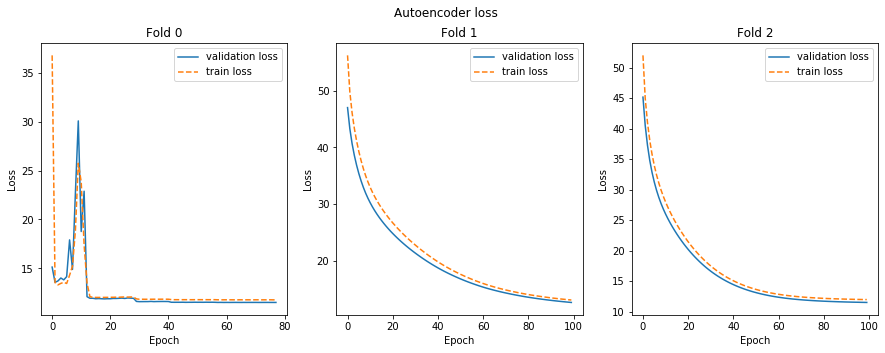

In [8]:
from src.visualization.visualize import visualize_cv_result
visualize_cv_result(results, f'Autoencoder loss')

In [9]:
squeeze = lambda els: list(map(lambda el: el.squeeze(), els))
X_tr = squeeze(np.dsplit(X, X.shape[2]))

model = model_fn()
model.fit(
    X_tr,
    X_tr,
    batch_size=64,
    epochs=50,
    verbose=1,
)

model.save('models/matrix_autoencoder.h5')

Epoch 1/50
12673/12673 [==============================] - 10s 806us/step - loss: 50.8112 - sequential_124_loss: 0.5985 - sequential_125_loss: 0.9571 - sequential_126_loss: 0.9195 - sequential_127_loss: 0.7188 - sequential_128_loss: 0.8190 - sequential_129_loss: 0.7225 - sequential_130_loss: 0.5823 - sequential_131_loss: 0.8756 - sequential_132_loss: 0.9382 - sequential_133_loss: 0.6262 - sequential_134_loss: 0.7051 - sequential_135_loss: 0.8612 - sequential_136_loss: 0.6753 - sequential_137_loss: 0.7912 - sequential_138_loss: 0.6262 - sequential_139_loss: 0.6570 - sequential_140_loss: 0.9699 - sequential_141_loss: 0.7110 - sequential_142_loss: 0.9330 - sequential_143_loss: 0.6064 - sequential_144_loss: 0.6715 - sequential_145_loss: 0.6988 - sequential_146_loss: 0.6678 - sequential_147_loss: 0.6487 - sequential_148_loss: 0.7543 - sequential_149_loss: 0.8452 - sequential_150_loss: 0.8222 - sequential_151_loss: 0.5841 - sequential_152_loss: 0.6119 - sequential_153_loss: 0.7071 - sequentia

12673/12673 [==============================] - 5s 385us/step - loss: 23.6740 - sequential_124_loss: 0.1362 - sequential_125_loss: 0.7568 - sequential_126_loss: 0.6459 - sequential_127_loss: 0.3265 - sequential_128_loss: 0.2992 - sequential_129_loss: 0.2886 - sequential_130_loss: 0.1381 - sequential_131_loss: 0.5522 - sequential_132_loss: 0.7013 - sequential_133_loss: 0.1275 - sequential_134_loss: 0.1478 - sequential_135_loss: 0.4178 - sequential_136_loss: 0.1500 - sequential_137_loss: 0.4345 - sequential_138_loss: 0.2486 - sequential_139_loss: 0.1370 - sequential_140_loss: 0.7564 - sequential_141_loss: 0.1486 - sequential_142_loss: 0.7494 - sequential_143_loss: 0.1535 - sequential_144_loss: 0.1887 - sequential_145_loss: 0.1657 - sequential_146_loss: 0.1966 - sequential_147_loss: 0.2436 - sequential_148_loss: 0.1762 - sequential_149_loss: 0.4533 - sequential_150_loss: 0.4323 - sequential_151_loss: 0.1790 - sequential_152_loss: 0.1556 - sequential_153_loss: 0.2295 - sequential_154_loss: 

12673/12673 [==============================] - 5s 385us/step - loss: 17.0284 - sequential_124_loss: 0.0847 - sequential_125_loss: 0.7223 - sequential_126_loss: 0.6148 - sequential_127_loss: 0.3009 - sequential_128_loss: 0.2519 - sequential_129_loss: 0.2461 - sequential_130_loss: 0.1026 - sequential_131_loss: 0.5233 - sequential_132_loss: 0.6624 - sequential_133_loss: 0.0778 - sequential_134_loss: 0.0932 - sequential_135_loss: 0.3825 - sequential_136_loss: 0.1119 - sequential_137_loss: 0.4046 - sequential_138_loss: 0.2089 - sequential_139_loss: 0.1050 - sequential_140_loss: 0.7177 - sequential_141_loss: 0.0832 - sequential_142_loss: 0.7110 - sequential_143_loss: 0.0822 - sequential_144_loss: 0.1305 - sequential_145_loss: 0.1185 - sequential_146_loss: 0.1344 - sequential_147_loss: 0.2048 - sequential_148_loss: 0.1216 - sequential_149_loss: 0.3248 - sequential_150_loss: 0.3412 - sequential_151_loss: 0.1514 - sequential_152_loss: 0.1084 - sequential_153_loss: 0.1861 - sequential_154_loss: 

12673/12673 [==============================] - 4s 287us/step - loss: 13.9883 - sequential_124_loss: 0.0545 - sequential_125_loss: 0.7272 - sequential_126_loss: 0.6119 - sequential_127_loss: 0.2916 - sequential_128_loss: 0.2277 - sequential_129_loss: 0.2349 - sequential_130_loss: 0.0895 - sequential_131_loss: 0.5182 - sequential_132_loss: 0.6535 - sequential_133_loss: 0.0654 - sequential_134_loss: 0.0773 - sequential_135_loss: 0.3705 - sequential_136_loss: 0.0980 - sequential_137_loss: 0.3907 - sequential_138_loss: 0.1979 - sequential_139_loss: 0.0916 - sequential_140_loss: 0.7217 - sequential_141_loss: 0.0578 - sequential_142_loss: 0.7142 - sequential_143_loss: 0.0675 - sequential_144_loss: 0.1190 - sequential_145_loss: 0.1057 - sequential_146_loss: 0.1198 - sequential_147_loss: 0.1914 - sequential_148_loss: 0.1106 - sequential_149_loss: 0.2596 - sequential_150_loss: 0.2618 - sequential_151_loss: 0.1336 - sequential_152_loss: 0.0984 - sequential_153_loss: 0.1697 - sequential_154_loss: 

12673/12673 [==============================] - 4s 292us/step - loss: 12.7264 - sequential_124_loss: 0.0498 - sequential_125_loss: 0.7354 - sequential_126_loss: 0.6125 - sequential_127_loss: 0.2877 - sequential_128_loss: 0.2255 - sequential_129_loss: 0.2334 - sequential_130_loss: 0.0836 - sequential_131_loss: 0.5181 - sequential_132_loss: 0.6573 - sequential_133_loss: 0.0602 - sequential_134_loss: 0.0740 - sequential_135_loss: 0.3701 - sequential_136_loss: 0.0886 - sequential_137_loss: 0.3879 - sequential_138_loss: 0.1967 - sequential_139_loss: 0.0838 - sequential_140_loss: 0.7300 - sequential_141_loss: 0.0539 - sequential_142_loss: 0.7216 - sequential_143_loss: 0.0640 - sequential_144_loss: 0.1160 - sequential_145_loss: 0.1029 - sequential_146_loss: 0.1170 - sequential_147_loss: 0.1827 - sequential_148_loss: 0.1078 - sequential_149_loss: 0.2327 - sequential_150_loss: 0.2237 - sequential_151_loss: 0.1272 - sequential_152_loss: 0.0959 - sequential_153_loss: 0.1645 - sequential_154_loss: 

In [10]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_124 (InputLayer)          (None, 64)           0                                            
__________________________________________________________________________________________________
input_125 (InputLayer)          (None, 64)           0                                            
__________________________________________________________________________________________________
input_126 (InputLayer)          (None, 64)           0                                            
__________________________________________________________________________________________________
input_127 (InputLayer)          (None, 64)           0                                            
__________________________________________________________________________________________________
input_128 

## Extract first layer that can embedes data

In [11]:
import keras
from keras.layers import Input
from keras.models import Model, load_model

In [12]:
model = load_model('models/matrix_autoencoder.h5')

In [13]:
seq_models = [layer for layer in model.layers if 'sequential' in layer.name]

encoder_layers = [seq_model.layers[1] for seq_model in seq_models]

In [14]:
inputs = [Input(shape=(create_params['input_shape'],)) for i in range(len(encoder_layers))]
encoded = [encoder(input) for input, encoder in zip(inputs, encoder_layers)]

encoder = Model(inputs=inputs, outputs=encoded)

## Adding noise

In [15]:
from src.utils import generate_anomalies

anomalies = generate_anomalies(window_length)

anomalies_amount = 300
anomaly_idxs = np.random.choice(X.shape[0], anomalies_amount, replace=False)

In [16]:
# Put random anomaly in some places
for idx in anomaly_idxs:
    X[idx, :, np.random.randint(X.shape[2])] = anomalies[np.random.randint(len(anomalies))]

In [17]:
encoded_X = encoder.predict(split_by_3rd_dim(X))
encoded_X = np.array(encoded_X)

First lets transform data

In [18]:
print(encoded_X.shape)

(41, 12673, 16)


In [19]:
encoded_X = np.swapaxes(encoded_X, 0, 1)
encoded_X = np.swapaxes(encoded_X, 1, 2)
print(encoded_X.shape)

(12673, 16, 41)


In [20]:
encoded_X = encoded_X.reshape(-1, encoded_X.shape[1]*encoded_X.shape[2])

## Clustering

### KMeans

Lets find optimal value for clusters amount

In [21]:
from sklearn.preprocessing import StandardScaler
encoded_X = StandardScaler().fit_transform(encoded_X)

In [22]:
from sklearn.cluster import KMeans

/home/elch10/miniconda3/lib/python3.6/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/elch10/miniconda3/lib/python3.6/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/elch10/miniconda3/lib/python3.6/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to Deja

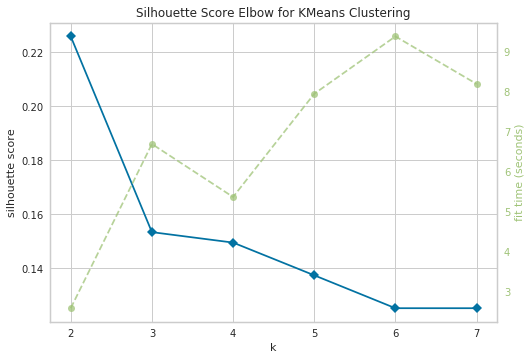

In [23]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,8), metric='silhouette')
visualizer.fit(encoded_X)
visualizer.poof()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


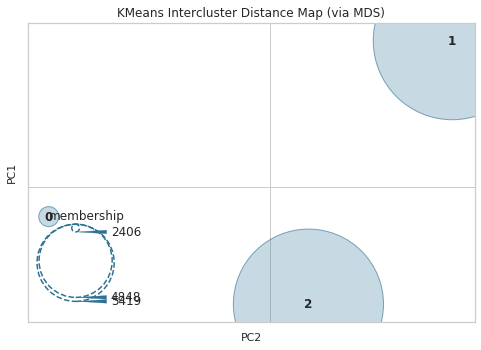

In [24]:
from yellowbrick.cluster import InterclusterDistance

kmeans_3 = KMeans(3)
intra_visualizer = InterclusterDistance(kmeans_3)

intra_visualizer.fit(encoded_X)        # Fit the data to the visualizer
intra_visualizer.poof()        # Draw/show/poof the data

**Можно предположить, что данные из 2 кластера являются аномалиями (KMeans с 3 кластерами)**

In [25]:
pred = kmeans_3.predict(encoded_X)
is_anomaly = np.zeros_like(pred)
is_anomaly[anomaly_idxs] = 1

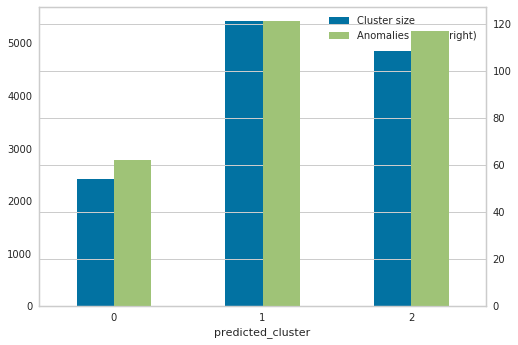

In [26]:
results = pd.DataFrame(dict(predicted_cluster=pred,
                            is_anomaly=is_anomaly)).pivot_table(
                                values='is_anomaly',
                                index='predicted_cluster',
                                aggfunc=[np.size, np.sum])
results.columns = pd.Index(['Cluster size', 'Anomalies inside'])
results.plot(kind='bar', secondary_y='Anomalies inside', rot=0)

## Check clusterization

In [133]:
# import src.visualization.visualize
# import importlib
# importlib.reload(src.visualization.visualize)

<module 'src.visualization.visualize' from '/mnt/d/anomaly-detection/src/visualization/visualize.py'>

In [20]:
from src.visualization.visualize import plot_random
from src.utils import inverse_ids

In [21]:
anomaly_ids = np.where(pred == 2)[0]
normal_ids = inverse_ids(anomaly_ids, len(encoded_X))

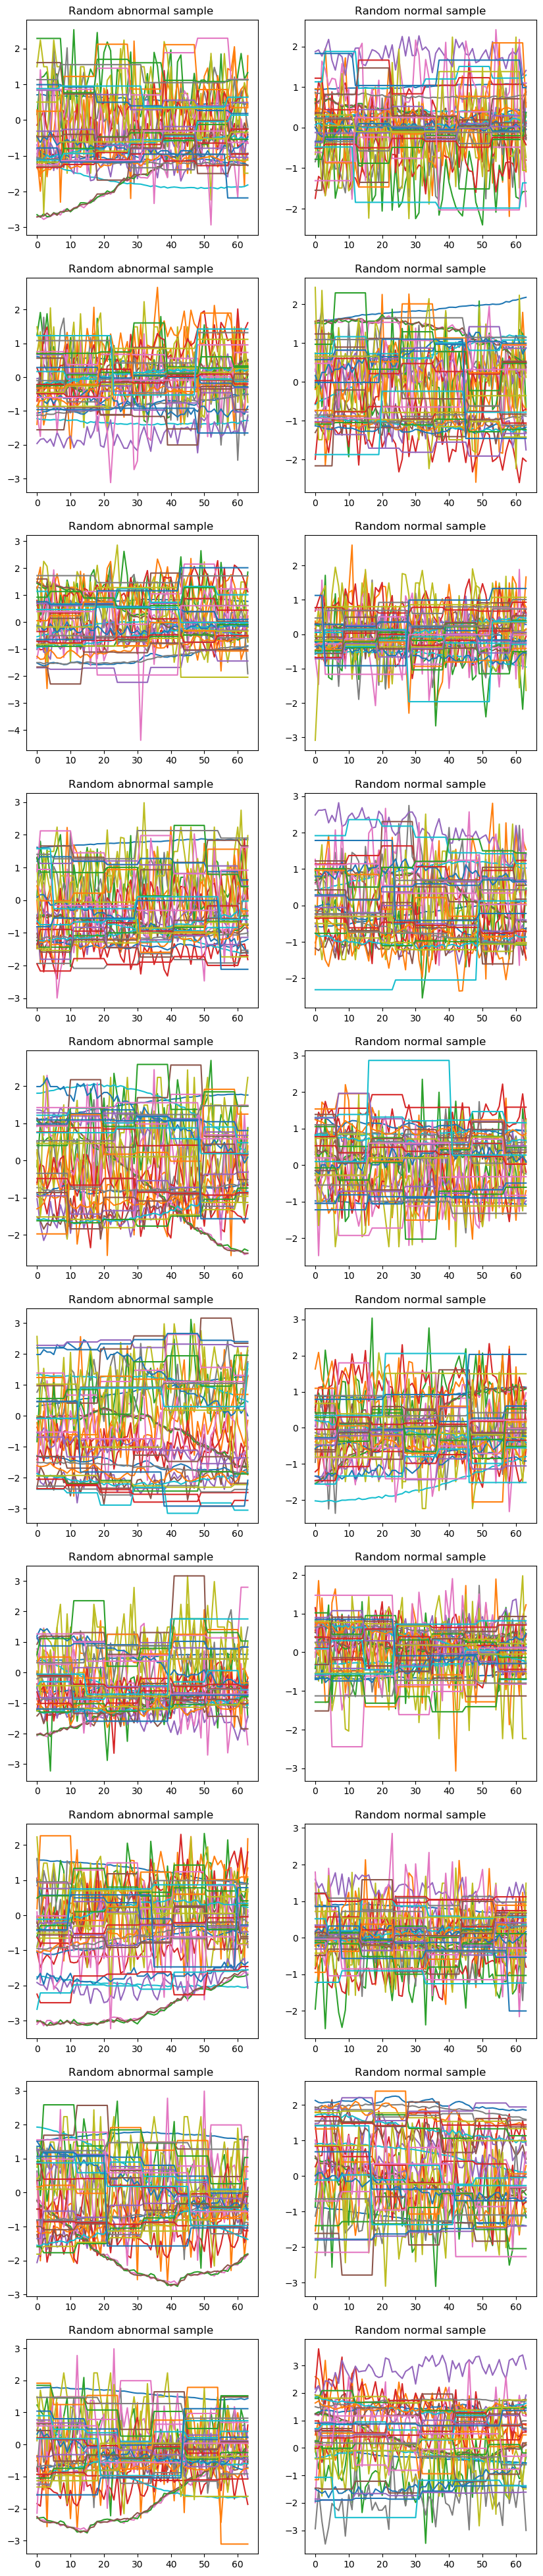

In [22]:
plot_random(X[anomaly_ids], X[normal_ids], 10)